In [1]:
# Load file
import pickle
pkl_file = open('HORRIBLE_CELLFIT_DATA.pkl','rb')
cellfit_data = pickle.load(pkl_file)

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize = (14,10))

ax.set(xlim = [0,1000], ylim = [100,850], aspect = 1)

for i in range(len(cellfit_data['x'])):
    ax.plot(cellfit_data['x'][i], cellfit_data['y'][i], lw = 3)

    ax.plot(cellfit_data['x'][i][0], cellfit_data['y'][i][0], 'ok')
    ax.plot(cellfit_data['x'][i][-1], cellfit_data['y'][i][-1], 'ok')

plt.show()

<Figure size 1400x1000 with 1 Axes>

In [3]:
import sys
sys.path.insert(0, '../cell_soap/')
from cell_describe import node, edge, cell, colony, data, manual_tracing

ex = manual_tracing(cellfit_data['x'], cellfit_data['y'])
print('Number of edges:',len(cellfit_data['x']))

nodes, edges, new = ex.cleanup(1)

cells = ex.find_cycles(edges)


Number of edges: 207


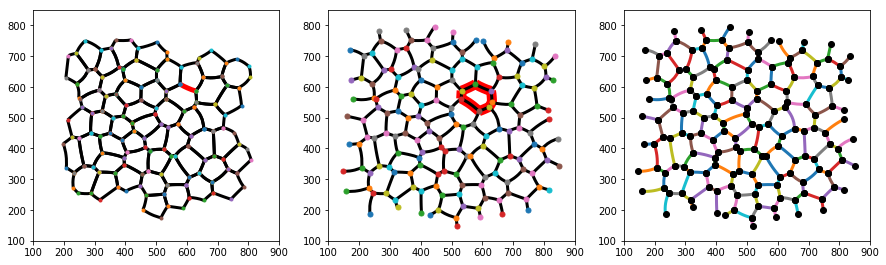

In [4]:
# Plot fitted edges

fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize = (15,8))

index = 133

ax.set(xlim = [100,900], ylim = [100,850], aspect = 1)
ax1.set(xlim = [100,900], ylim = [100,850], aspect = 1)
ax2.set(xlim = [100,900], ylim = [100,850], aspect = 1)
[c.plot(ax, lw = 3) for c in cells]
edges[index].cells[1].plot(ax1, lw = 10, color = 'red')

[n.plot(ax1, markersize = 10) for n in nodes]
[n.plot(ax1, markersize = 20) for n in nodes if len(n.edges) == 2]
[e.plot(ax1, lw = 3) for e in edges]
edges[index].plot(ax, color = 'red', lw = 5)

# [n.plot(ax2, markersize = 10) for n in nodes]
# [n.plot(ax2, markersize = 20) for n in nodes if len(n.edges) == 2]
# [e.plot(ax2, lw = 3) for e in edges]

for i in range(len(cellfit_data['x'])):
    ax2.plot(cellfit_data['x'][i], cellfit_data['y'][i], lw = 3)
    ax2.plot(cellfit_data['x'][i][0], cellfit_data['y'][i][0], 'ok')
    ax2.plot(cellfit_data['x'][i][-1], cellfit_data['y'][i][-1], 'ok')


plt.show()

In [12]:

cell0, cell1 = edges[index].cells[0], edges[index].cells[1]
edges[index].convex_concave(cell0, cell1)

181.96745608231763 256.8540818855478


In [121]:
cell1

In [51]:
print(edges[index].center_of_circle)
print(edges[index].node_a.loc)

[677.4810289224588, 775.7855949902391]
(713.588558966736, 634.157021431312)


In [35]:
edges[index]

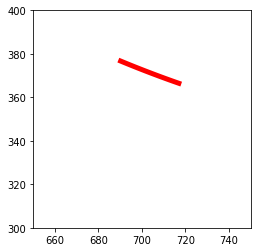

In [62]:
fig, ax = plt.subplots(1,1)
#ax.set(xlim = [edges[index].node_a.loc[0],edges[index].node_b.loc[0]], ylim = [edges[index].node_a.loc[1],edges[index].node_b.loc[1]], aspect = 1)
ax.set(xlim = [650,750], ylim = [300,400], aspect = 1)

edges[index].plot(ax, color = 'red', lw = 5)

In [5]:
# Calculate tension and pressure
import numpy.linalg as la
# Get unique cells
cells = ex.find_cycles(edges)

# Get tension and pressure
edges2 = [e for e in edges if e.radius is not None]
col1 = colony(cells, edges2, nodes)
tensions, P_T, A = col1.calculate_tension(solver = 'KKT')

pressures, P_P, B = col1.calculate_pressure(solver = 'KKT')

print('Number of edges:',len(col1.tot_edges))
print('Number of nodes:',len(col1.tot_nodes))
print('\n')

168.20393198529342 80.9429069076675
280.96438475566 182.9744820250115
714.0672260017393 652.2138916640915
45.22707141664241 111.43321664774079
997.0311272194785 1056.00990155811
85.615496562737 184.85764538964355
1338.6128365103755 1271.3462776894503
312.7990976827827 403.1876725429152
229.37686983153213 314.95002725419727
344.72408453620477 427.254637827688
387.1317017067923 320.25817690805036
147.89672528292752 69.59983976732647
205.9473090582441 119.79126044965176
190.38008961146681 116.17196268301812
140.16171600081452 52.04094379108102
174.1783029589072 110.58425725795757
227.3840458208729 139.50959664861173
1693.4999162110685 1768.8709070517039
136.23018645019647 192.88983664929478
250.82617602403923 318.3508526757704
199.41756364496376 276.3324571753115
243.44243496734623 307.79430320476905
27855.61622315492 27930.05020756745
410.78529890646365 500.86004879737055
236.39278661946486 164.50161088882112
90.99284979304885 183.30548529993172
722.6828344484048 654.5093833954735
253.69

In [6]:
import numpy as np
np.mean(pressures)

-7.372574772901431e-20

In [4]:
# Load file
import pickle
pkl_file = open('HORRIBLE_CELLFIT_DATA_sol_tension_v2.pkl','rb')
edge_dict = pickle.load(pkl_file)
tensions = edge_dict['tension']

In [5]:
import pickle
pkl_file = open('HORRIBLE_CELLFIT_DATA_sol_colony_v2.pkl','rb')
col1 = pickle.load(pkl_file)

In [6]:
# Load file
import pickle
pkl_file = open('HORRIBLE_CELLFIT_DATA_sol_pressure_v2.pkl','rb')
edge_dict = pickle.load(pkl_file)
pressures = edge_dict['pressure']

[(100, 850), (100, 900), None]

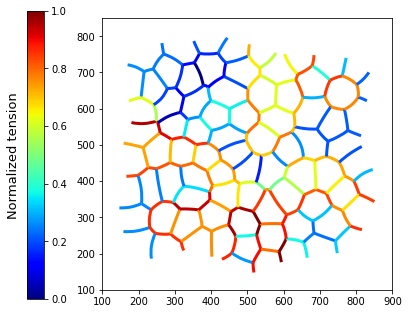

In [7]:
# Plot 
import pylab
import matplotlib.pyplot as plt
from matplotlib import cm
fig, ax = plt.subplots(1,1,figsize=(8,5))
col1.plot_tensions(ax, fig, tensions, lw = 3)
ax.set(xlim = [100,900], ylim = [100,850], aspect = 1)

[(100, 850), (100, 900), None]

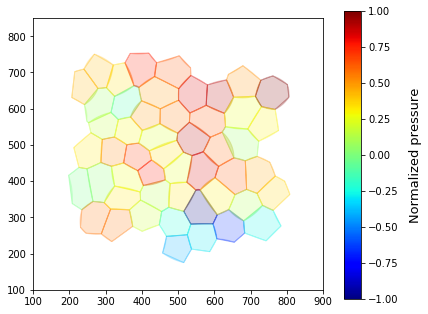

In [8]:
# Plot 
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,5))
col1.plot_pressures(ax, fig, pressures, lw = 3)
ax.set(xlim = [100,900], ylim = [100,850], aspect = 1)

[(100, 850), (100, 900), None]

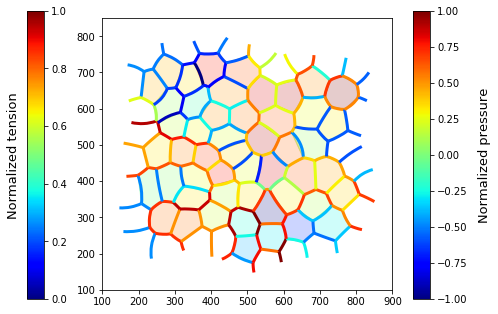

In [9]:
# Plot 
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,5))
col1.plot(ax, fig,tensions, pressures, lw = 3)
ax.set(xlim = [100,900], ylim = [100,850], aspect = 1)

In [8]:
import numpy as np
np.shape(B)

(122, 50)

In [15]:
len(col1.edges)

176

In [19]:
np.set_printoptions(threshold=np.nan)

In [20]:
B

array([[ 1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
     

In [24]:
rows=[]
for i in range(122):
    check = 0
    for r in rows:
        if np.array_equal(B[i,:], r):
            print('how')
        if all(r == B[i,:]):
            check = 1
    if check == 0:
        rows.append(list(B[i,:]))

    

In [25]:
rows

[[1.0,
  0.0,
  -1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [1.0,
  0.0,
  0.0,
  -1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [1.0,
  0.0,
  0.0,
  0.0,
  -1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
 

In [7]:
import numpy as np
np.shape(B)

(122, 50)

In [14]:
new = []
for e in col1.edges:
    if len(e.cells) == 2:
        new.append(e)

In [15]:
len(new)

122

In [26]:
import collections
[item for item, count in collections.Counter(rows).items() if count > 1]

TypeError: unhashable type: 'list'

In [6]:
len(col1.cells)

50

In [7]:
rhs

NameError: name 'rhs' is not defined

In [9]:
P_P

array([[ 3.,  0., -1., ...,  0.,  0.,  1.],
       [ 0.,  2.,  0., ...,  0.,  0.,  1.],
       [-1.,  0.,  4., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  0.,  0., ...,  3.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  3.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  0.]])

In [18]:
col1.edges[0].y_co_ords

[338.086309996333, 333.427301355, 328.876941443677, 320.816551932555]

In [21]:
edges[0].x_co_ords

[166.281958825942, 174.760255331311, 183.368005590974, 197.987405114178]

In [25]:
list(cells[0].centroid())

[230.20327408697133, 381.7215615572216]

In [30]:
list(edges[0].node_a.loc) + list(edges[0].node_b.loc)

[197.987405114178, 415.867025571326, 166.281958825942, 413.065955815477]

In [32]:
list(edges[0].node_a.loc) + list(edges[0].node_b.loc)

[197.987405114178, 415.867025571326, 166.281958825942, 413.065955815477]

In [9]:
[(x + y)/2 for x,y in zip(edges[0].node_a.loc, edges[0].node_b.loc)]

[182.13468197006, 414.4664906934015]

In [37]:
import numpy as np
edges[0].x_co_ords

[166.281958825942, 174.760255331311, 183.368005590974, 197.987405114178]

In [41]:
x = [1, 1]
y =[4,4]
np.linalg.norm(x)

1.4142135623730951